### Machine Learning Model: Linear Regression Algorithm to predict the age based on tree girth and diameter 

The ML algorithm here represents a linear regression model executed on 

    -- X that has the following variables: tree height, girth, crown diameter,and tree diameter

    -- Y consists of the estimated age which calculated by multiplying the tree diameter by growth factor of the corresponding 
    tree species

The result shows two arrays one have the Y used for testing, and the predicted Y (estimated age)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df_dataset = pd.read_csv('Berlin_Trees_Data.csv')

In [41]:
df_dataset

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,...,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk,Krone Durchmesser in inches,Stamm Umfang in inches,Baumhöhe in inches,Diameter,estimated_tree_age
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,...,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf,433.070866,74.409449,669.291339,23.697277,85.310196
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,...,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf,472.440945,72.834646,984.251969,23.195747,83.504689
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,...,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf,314.960630,53.149606,472.440945,16.926626,60.935854
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,...,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf,314.960630,84.645669,669.291339,26.957220,97.045990
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,...,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf,511.811024,69.291339,669.291339,22.067305,79.442299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406213,406213,00008100:002736c2,58/2,101624,Lobitzweg Köp,Pyramiden-Eiche,Quercus robur 'Fastigiata',QUERCUS,Lobitzweg,0,...,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614,196.850394,2.256883,8.124781
406214,406214,00008100:002cc7d0,29/1,102134,Pohlestraße Köp,Pyramiden-Hainbuche,Carpinus betulus 'Fastigiata',CARPINUS,Pohlestraße,0,...,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614,196.850394,2.256883,3.543307
406215,406215,00008100:002d53d4,A/81,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,...,14,NaN,57.0,6.0,Treptow-Köpenick,NaN,22.440945,236.220472,7.146798,34.304629
406216,406216,00008100:002d53df,A/80,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,...,14,NaN,75.0,6.0,Treptow-Köpenick,NaN,29.527559,236.220472,9.403681,45.137670


###### Convert Tree Height, Girth, Crown Diameter to Inches:

In [4]:
# convert height into inches:
df_dataset['Krone Durchmesser in inches'] = df_dataset['Krone Durchmesser in m']/0.0254
df_dataset

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk,Krone Durchmesser in inches
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf,433.070866
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf,472.440945
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,0,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf,314.960630
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,0,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf,314.960630
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,0,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf,511.811024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406213,406213,00008100:002736c2,58/2,101624,Lobitzweg Köp,Pyramiden-Eiche,Quercus robur 'Fastigiata',QUERCUS,Lobitzweg,0,0,2021,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039
406214,406214,00008100:002cc7d0,29/1,102134,Pohlestraße Köp,Pyramiden-Hainbuche,Carpinus betulus 'Fastigiata',CARPINUS,Pohlestraße,0,0,2021,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039
406215,406215,00008100:002d53d4,A/81,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,0,2008,14,NaN,57.0,6.0,Treptow-Köpenick,NaN
406216,406216,00008100:002d53df,A/80,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,0,2008,14,NaN,75.0,6.0,Treptow-Köpenick,NaN


In [5]:
# convert girth into inches:
df_dataset['Stamm Umfang in inches'] = df_dataset['Stamm Umfang in cm']/2.54
df_dataset

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk,Krone Durchmesser in inches,Stamm Umfang in inches
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf,433.070866,74.409449
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf,472.440945,72.834646
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,0,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf,314.960630,53.149606
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,0,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf,314.960630,84.645669
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,0,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf,511.811024,69.291339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406213,406213,00008100:002736c2,58/2,101624,Lobitzweg Köp,Pyramiden-Eiche,Quercus robur 'Fastigiata',QUERCUS,Lobitzweg,0,0,2021,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614
406214,406214,00008100:002cc7d0,29/1,102134,Pohlestraße Köp,Pyramiden-Hainbuche,Carpinus betulus 'Fastigiata',CARPINUS,Pohlestraße,0,0,2021,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614
406215,406215,00008100:002d53d4,A/81,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,0,2008,14,NaN,57.0,6.0,Treptow-Köpenick,NaN,22.440945
406216,406216,00008100:002d53df,A/80,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,0,2008,14,NaN,75.0,6.0,Treptow-Köpenick,NaN,29.527559


In [6]:
# convert crown diameter into inches:
df_dataset['Baumhöhe in inches'] = df_dataset['Baumhöhe in m']/0.0254
df_dataset

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk,Krone Durchmesser in inches,Stamm Umfang in inches,Baumhöhe in inches
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf,433.070866,74.409449,669.291339
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf,472.440945,72.834646,984.251969
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,0,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf,314.960630,53.149606,472.440945
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,0,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf,314.960630,84.645669,669.291339
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,0,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf,511.811024,69.291339,669.291339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406213,406213,00008100:002736c2,58/2,101624,Lobitzweg Köp,Pyramiden-Eiche,Quercus robur 'Fastigiata',QUERCUS,Lobitzweg,0,0,2021,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614,196.850394
406214,406214,00008100:002cc7d0,29/1,102134,Pohlestraße Köp,Pyramiden-Hainbuche,Carpinus betulus 'Fastigiata',CARPINUS,Pohlestraße,0,0,2021,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614,196.850394
406215,406215,00008100:002d53d4,A/81,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,0,2008,14,NaN,57.0,6.0,Treptow-Köpenick,NaN,22.440945,236.220472
406216,406216,00008100:002d53df,A/80,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,0,2008,14,NaN,75.0,6.0,Treptow-Köpenick,NaN,29.527559,236.220472


In [7]:
# Calculate the diameter of trees:
df_dataset['Diameter'] = df_dataset['Stamm Umfang in inches'] / 3.14
df_dataset

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,...,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk,Krone Durchmesser in inches,Stamm Umfang in inches,Baumhöhe in inches,Diameter
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,...,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf,433.070866,74.409449,669.291339,23.697277
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,...,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf,472.440945,72.834646,984.251969,23.195747
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,...,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf,314.960630,53.149606,472.440945,16.926626
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,...,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf,314.960630,84.645669,669.291339,26.957220
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,...,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf,511.811024,69.291339,669.291339,22.067305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406213,406213,00008100:002736c2,58/2,101624,Lobitzweg Köp,Pyramiden-Eiche,Quercus robur 'Fastigiata',QUERCUS,Lobitzweg,0,...,2021,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614,196.850394,2.256883
406214,406214,00008100:002cc7d0,29/1,102134,Pohlestraße Köp,Pyramiden-Hainbuche,Carpinus betulus 'Fastigiata',CARPINUS,Pohlestraße,0,...,2021,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614,196.850394,2.256883
406215,406215,00008100:002d53d4,A/81,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,...,2008,14,NaN,57.0,6.0,Treptow-Köpenick,NaN,22.440945,236.220472,7.146798
406216,406216,00008100:002d53df,A/80,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,...,2008,14,NaN,75.0,6.0,Treptow-Köpenick,NaN,29.527559,236.220472,9.403681


In [9]:
# Calculate the tree age based on the growth factor and tree diameter 
df_dataset.loc[df_dataset['Gattung botanisch'] == 'ACER', 'estimated_tree_age'] = df_dataset['Diameter']*48
df_dataset.loc[df_dataset['Gattung botanisch'] == 'AESCULUS', 'estimated_tree_age'] = df_dataset['Diameter']*36
df_dataset.loc[df_dataset['Gattung botanisch'] == 'AILANTHUS', 'estimated_tree_age'] = df_dataset['Diameter']*36
df_dataset.loc[df_dataset['Gattung botanisch'] == 'ALNUS', 'estimated_tree_age'] = df_dataset['Diameter']*24
df_dataset.loc[df_dataset['Gattung botanisch'] == 'AMELANCHIER', 'estimated_tree_age'] = df_dataset['Diameter']*12
df_dataset.loc[df_dataset['Gattung botanisch'] == 'Abies', 'estimated_tree_age'] = df_dataset['Diameter']*0.01
df_dataset.loc[df_dataset['Gattung botanisch'] == 'BETULA', 'estimated_tree_age'] = df_dataset['Diameter']*36.25
df_dataset.loc[df_dataset['Gattung botanisch'] == 'CARPINUS', 'estimated_tree_age'] = df_dataset['Diameter']*15.7
df_dataset.loc[df_dataset['Gattung botanisch'] == 'CASTANEA', 'estimated_tree_age'] = df_dataset['Diameter']*4.5
df_dataset.loc[df_dataset['Gattung botanisch'] == 'CATALPA', 'estimated_tree_age'] = df_dataset['Diameter']*24
df_dataset.loc[df_dataset['Gattung botanisch'] == 'CEDRUS', 'estimated_tree_age'] = df_dataset['Diameter']*24
df_dataset.loc[df_dataset['Gattung botanisch'] == 'CELTIS', 'estimated_tree_age'] = df_dataset['Diameter']*78
df_dataset.loc[df_dataset['Gattung botanisch'] == 'CERCIDIPHYLLUM', 'estimated_tree_age'] = df_dataset['Diameter']*48
df_dataset.loc[df_dataset['Gattung botanisch'] == 'CERCIS', 'estimated_tree_age'] = df_dataset['Diameter']*12
df_dataset.loc[df_dataset['Gattung botanisch'] == 'CHAMAECYPARIS', 'estimated_tree_age'] = df_dataset['Diameter']*6
df_dataset.loc[df_dataset['Gattung botanisch'] == 'CORYLUS', 'estimated_tree_age'] = df_dataset['Diameter']*36.5
df_dataset.loc[df_dataset['Gattung botanisch'] == 'CRATAEGUS', 'estimated_tree_age'] = df_dataset['Diameter']*15.7
df_dataset.loc[df_dataset['Gattung botanisch'] == 'ELAEAGNUS', 'estimated_tree_age'] = df_dataset['Diameter']*12
df_dataset.loc[df_dataset['Gattung botanisch'] == 'FAGUS', 'estimated_tree_age'] = df_dataset['Diameter']*15.7
df_dataset.loc[df_dataset['Gattung botanisch'] == 'FRAXINUS', 'estimated_tree_age'] = df_dataset['Diameter']*24
df_dataset.loc[df_dataset['Gattung botanisch'] == 'GINKGO', 'estimated_tree_age'] = df_dataset['Diameter']*13
df_dataset.loc[df_dataset['Gattung botanisch'] == 'GLEDITSIA', 'estimated_tree_age'] = df_dataset['Diameter']*14
df_dataset.loc[df_dataset['Gattung botanisch'] == 'GYMNOCLADUS', 'estimated_tree_age'] = df_dataset['Diameter']*12
df_dataset.loc[df_dataset['Gattung botanisch'] == 'HIPPOPHAE', 'estimated_tree_age'] = df_dataset['Diameter']*236
df_dataset.loc[df_dataset['Gattung botanisch'] == 'JUGLANS', 'estimated_tree_age'] = df_dataset['Diameter']*13
df_dataset.loc[df_dataset['Gattung botanisch'] == 'KOELREUTERIA', 'estimated_tree_age'] = df_dataset['Diameter']*13
df_dataset.loc[df_dataset['Gattung botanisch'] == 'LARIX', 'estimated_tree_age'] = df_dataset['Diameter']*24
df_dataset.loc[df_dataset['Gattung botanisch'] == 'LIQUIDAMBAR', 'estimated_tree_age'] = df_dataset['Diameter']*2
df_dataset.loc[df_dataset['Gattung botanisch'] == 'LIRIODENDRON', 'estimated_tree_age'] = df_dataset['Diameter']*12
df_dataset.loc[df_dataset['Gattung botanisch'] == 'MAGNOLIA', 'estimated_tree_age'] = df_dataset['Diameter']*12
df_dataset.loc[df_dataset['Gattung botanisch'] == 'MALUS', 'estimated_tree_age'] = df_dataset['Diameter']*12
df_dataset.loc[df_dataset['Gattung botanisch'] == 'MESPILUS', 'estimated_tree_age'] = df_dataset['Diameter']*236
df_dataset.loc[df_dataset['Gattung botanisch'] == 'METASEQUOIA', 'estimated_tree_age'] = df_dataset['Diameter']*24
df_dataset.loc[df_dataset['Gattung botanisch'] == 'MORUS', 'estimated_tree_age'] = df_dataset['Diameter']*393
df_dataset.loc[df_dataset['Gattung botanisch'] == 'NOTHOFAGUS', 'estimated_tree_age'] = df_dataset['Diameter']*39
df_dataset.loc[df_dataset['Gattung botanisch'] == 'NYSSA', 'estimated_tree_age'] = df_dataset['Diameter']*12
df_dataset.loc[df_dataset['Gattung botanisch'] == 'OSTRYA', 'estimated_tree_age'] = df_dataset['Diameter']*2.4
df_dataset.loc[df_dataset['Gattung botanisch'] == 'PARROTIA', 'estimated_tree_age'] = df_dataset['Diameter']*12
df_dataset.loc[df_dataset['Gattung botanisch'] == 'PAULOWNIA', 'estimated_tree_age'] = df_dataset['Diameter']*39
df_dataset.loc[df_dataset['Gattung botanisch'] == 'PHELLODENDRON', 'estimated_tree_age'] = df_dataset['Diameter']*472
df_dataset.loc[df_dataset['Gattung botanisch'] == 'PICEA', 'estimated_tree_age'] = df_dataset['Diameter']*13
df_dataset.loc[df_dataset['Gattung botanisch'] == 'PINUS', 'estimated_tree_age'] = df_dataset['Diameter']*12
df_dataset.loc[df_dataset['Gattung botanisch'] == 'PLATANUS', 'estimated_tree_age'] = df_dataset['Diameter']*13
df_dataset.loc[df_dataset['Gattung botanisch'] == 'POPULUS', 'estimated_tree_age'] = df_dataset['Diameter']*30
df_dataset.loc[df_dataset['Gattung botanisch'] == 'PRUNUS', 'estimated_tree_age'] = df_dataset['Diameter']*11
df_dataset.loc[df_dataset['Gattung botanisch'] == 'PSEUDOTSUGA', 'estimated_tree_age'] = df_dataset['Diameter']*40
df_dataset.loc[df_dataset['Gattung botanisch'] == 'PTEROCARYA', 'estimated_tree_age'] = df_dataset['Diameter']*11
df_dataset.loc[df_dataset['Gattung botanisch'] == 'PYRUS', 'estimated_tree_age'] = df_dataset['Diameter']*13
df_dataset.loc[df_dataset['Gattung botanisch'] == 'QUERCUS', 'estimated_tree_age'] = df_dataset['Diameter']*36
df_dataset.loc[df_dataset['Gattung botanisch'] == 'ROBINIA', 'estimated_tree_age'] = df_dataset['Diameter']*12
df_dataset.loc[df_dataset['Gattung botanisch'] == 'SALIX', 'estimated_tree_age'] = df_dataset['Diameter']*2
df_dataset.loc[df_dataset['Gattung botanisch'] == 'SEQUOIADENDRON', 'estimated_tree_age'] = df_dataset['Diameter']*24
df_dataset.loc[df_dataset['Gattung botanisch'] == 'SOPHORA', 'estimated_tree_age'] = df_dataset['Diameter']*9
df_dataset.loc[df_dataset['Gattung botanisch'] == 'SORBUS', 'estimated_tree_age'] = df_dataset['Diameter']*236
df_dataset.loc[df_dataset['Gattung botanisch'] == 'SYRINGA', 'estimated_tree_age'] = df_dataset['Diameter']*12
df_dataset.loc[df_dataset['Gattung botanisch'] == 'TAXUS', 'estimated_tree_age'] = df_dataset['Diameter']*6
df_dataset.loc[df_dataset['Gattung botanisch'] == 'TETRADIUM', 'estimated_tree_age'] = df_dataset['Diameter']*24
df_dataset.loc[df_dataset['Gattung botanisch'] == 'THUJA', 'estimated_tree_age'] = df_dataset['Diameter']*36
df_dataset.loc[df_dataset['Gattung botanisch'] == 'TILIA', 'estimated_tree_age'] = df_dataset['Diameter']*13
df_dataset.loc[df_dataset['Gattung botanisch'] == 'TOONA', 'estimated_tree_age'] = df_dataset['Diameter']*60
df_dataset.loc[df_dataset['Gattung botanisch'] == 'TSUGA', 'estimated_tree_age'] = df_dataset['Diameter']*1.18
df_dataset.loc[df_dataset['Gattung botanisch'] == 'ULMUS', 'estimated_tree_age'] = df_dataset['Diameter']*36
df_dataset.loc[df_dataset['Gattung botanisch'] == 'ZELKOVA', 'estimated_tree_age'] = df_dataset['Diameter']*13
df_dataset


,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,...,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk,Krone Durchmesser in inches,Stamm Umfang in inches,Baumhöhe in inches,Diameter,estimated_tree_age
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,...,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf,433.070866,74.409449,669.291339,23.697277,853.101961
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,...,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf,472.440945,72.834646,984.251969,23.195747,835.046893
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,...,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf,314.960630,53.149606,472.440945,16.926626,609.358544
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,...,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf,314.960630,84.645669,669.291339,26.957220,970.459903
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,...,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf,511.811024,69.291339,669.291339,22.067305,794.422990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406213,406213,00008100:002736c2,58/2,101624,Lobitzweg Köp,Pyramiden-Eiche,Quercus robur 'Fastigiata',QUERCUS,Lobitzweg,0,...,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614,196.850394,2.256883,81.247806
406214,406214,00008100:002cc7d0,29/1,102134,Pohlestraße Köp,Pyramiden-Hainbuche,Carpinus betulus 'Fastigiata',CARPINUS,Pohlestraße,0,...,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614,196.850394,2.256883,35.433071
406215,406215,00008100:002d53d4,A/81,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,...,14,NaN,57.0,6.0,Treptow-Köpenick,NaN,22.440945,236.220472,7.146798,343.046291
406216,406216,00008100:002d53df,A/80,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,...,14,NaN,75.0,6.0,Treptow-Köpenick,NaN,29.527559,236.220472,9.403681,451.376699


In [10]:
df_dataset['estimated_tree_age'] = df_dataset['estimated_tree_age']/10
df_dataset

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,...,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk,Krone Durchmesser in inches,Stamm Umfang in inches,Baumhöhe in inches,Diameter,estimated_tree_age
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,...,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf,433.070866,74.409449,669.291339,23.697277,85.310196
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,...,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf,472.440945,72.834646,984.251969,23.195747,83.504689
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,...,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf,314.960630,53.149606,472.440945,16.926626,60.935854
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,...,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf,314.960630,84.645669,669.291339,26.957220,97.045990
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,...,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf,511.811024,69.291339,669.291339,22.067305,79.442299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406213,406213,00008100:002736c2,58/2,101624,Lobitzweg Köp,Pyramiden-Eiche,Quercus robur 'Fastigiata',QUERCUS,Lobitzweg,0,...,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614,196.850394,2.256883,8.124781
406214,406214,00008100:002cc7d0,29/1,102134,Pohlestraße Köp,Pyramiden-Hainbuche,Carpinus betulus 'Fastigiata',CARPINUS,Pohlestraße,0,...,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614,196.850394,2.256883,3.543307
406215,406215,00008100:002d53d4,A/81,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,...,14,NaN,57.0,6.0,Treptow-Köpenick,NaN,22.440945,236.220472,7.146798,34.304629
406216,406216,00008100:002d53df,A/80,30204,Kiefholzstraße Rev. I Ba,Feld-Ahorn,Acer campestre,ACER,Kiefholzstraße,0,...,14,NaN,75.0,6.0,Treptow-Köpenick,NaN,29.527559,236.220472,9.403681,45.137670


In [23]:
# Exclude null values from the dataset 
df_not_null = df_dataset.dropna()
df_not_null

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,...,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk,Krone Durchmesser in inches,Stamm Umfang in inches,Baumhöhe in inches,Diameter,estimated_tree_age
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,...,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf,433.070866,74.409449,669.291339,23.697277,85.310196
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,...,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf,472.440945,72.834646,984.251969,23.195747,83.504689
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,...,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf,314.960630,53.149606,472.440945,16.926626,60.935854
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,...,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf,314.960630,84.645669,669.291339,26.957220,97.045990
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,...,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf,511.811024,69.291339,669.291339,22.067305,79.442299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406211,406211,00008100:002d8837,42,40414,Straße am Flugplatz Jo,Resista Ulme 'New Horizon',Ulmus Resista (R) 'New Horizon',ULMUS,Straße am Flugplatz,0,...,1,1.5,20.0,6.0,Treptow-Köpenick,59.055118,7.874016,236.220472,2.507648,9.027534
406212,406212,00008100:002d8926,A/12,100194,Am Generalshof Köp,Rot-Buche,Fagus sylvatica,FAGUS,Am Generalshof,0,...,31,5.0,70.0,9.0,Treptow-Köpenick,196.850394,27.559055,354.330709,8.776769,13.779528
406213,406213,00008100:002736c2,58/2,101624,Lobitzweg Köp,Pyramiden-Eiche,Quercus robur 'Fastigiata',QUERCUS,Lobitzweg,0,...,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614,196.850394,2.256883,8.124781
406214,406214,00008100:002cc7d0,29/1,102134,Pohlestraße Köp,Pyramiden-Hainbuche,Carpinus betulus 'Fastigiata',CARPINUS,Pohlestraße,0,...,1,0.5,18.0,5.0,Treptow-Köpenick,19.685039,7.086614,196.850394,2.256883,3.543307


##### Machine Learning: Linear Regression Algorithm

In [24]:
# Specify the X and Y variables for the ML model
X = df_not_null.filter(items=['Krone Durchmesser in inches', 'Stamm Umfang in inches','Baumhöhe in inches','Diameter'])
Y = df_not_null.filter(items=['estimated_tree_age'])

In [25]:
X

,Krone Durchmesser in inches,Stamm Umfang in inches,Baumhöhe in inches,Diameter
0,433.070866,74.409449,669.291339,23.697277
1,472.440945,72.834646,984.251969,23.195747
2,314.960630,53.149606,472.440945,16.926626
3,314.960630,84.645669,669.291339,26.957220
4,511.811024,69.291339,669.291339,22.067305
...,...,...,...,...
406211,59.055118,7.874016,236.220472,2.507648
406212,196.850394,27.559055,354.330709,8.776769
406213,19.685039,7.086614,196.850394,2.256883
406214,19.685039,7.086614,196.850394,2.256883


In [12]:
from sklearn.model_selection import train_test_split

###### Split Data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
# shape of the dataset
X_train.shape, Y_train.shape

((184715, 4), (184715, 1))

###### Import libraries needed for the linear regression model

In [28]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Round variables to make thrm 2 decimals 
decimals = 2    
X['Krone Durchmesser in inches'] = X['Krone Durchmesser in inches'].apply(lambda x: round(x, decimals))
X['Stamm Umfang in inches'] = X['Stamm Umfang in inches'].apply(lambda x: round(x, decimals))
X['Baumhöhe in inches'] = X['Baumhöhe in inches'].apply(lambda x: round(x, decimals))
X['Diameter'] = X['Diameter'].apply(lambda x: round(x, decimals))
X

,Krone Durchmesser in inches,Stamm Umfang in inches,Baumhöhe in inches,Diameter
0,433.07,74.41,669.29,23.70
1,472.44,72.83,984.25,23.20
2,314.96,53.15,472.44,16.93
3,314.96,84.65,669.29,26.96
4,511.81,69.29,669.29,22.07
...,...,...,...,...
406211,59.06,7.87,236.22,2.51
406212,196.85,27.56,354.33,8.78
406213,19.69,7.09,196.85,2.26
406214,19.69,7.09,196.85,2.26


In [32]:
model = linear_model.LinearRegression()

In [33]:
model.fit(X_train, Y_train)

LinearRegression()

In [34]:
Y_pred = model.predict(X_test)

In [35]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [[ 0.00522242  0.76037409 -0.020068    0.24215735]]
Intercept: [9.14116479]
Mean squared error (MSE): 963.87
Coefficient of determination (R^2): 0.26


In [36]:
import seaborn as sns

In [37]:
Y_test

,estimated_tree_age
194931,27.082602
263669,25.728472
400417,25.728472
400909,39.721150
405266,27.082602
...,...
116225,22.568835
124200,8.801846
249664,11.362781
113577,52.961533


In [38]:
import numpy as np
np.array(Y_test)

array([[27.08260194],
       [25.72847184],
       [25.72847184],
       ...,
       [11.36278148],
       [52.96153267],
       [45.51381714]])

In [39]:
Y_pred

array([[19.27053794],
       [20.65135986],
       [24.01728267],
       ...,
       [ 9.89464383],
       [34.47662632],
       [40.37902695]])

In [43]:
import matplotlib.pyplot as plt

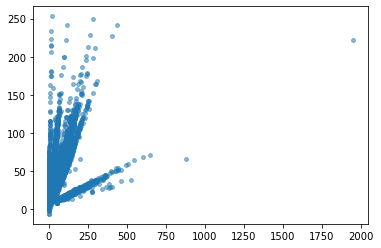

In [46]:
# Show data in a scatter plot
marker_size=15
plt.scatter(Y_test, Y_pred, marker_size, alpha=0.5)